In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 850 kB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car_Evaluation_Data.csv to Car_Evaluation_Data.csv


In [ ]:
import io
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split  
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

In [ ]:
data= pd.read_csv(io.BytesIO(uploaded['Car_Evaluation_Data.csv']))
data.columns = ['Car Acceptability', 'Buying Price', 'Maintenance Price', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'Safety']

In [ ]:
data.head(10)

,Car Acceptability,Buying Price,Maintenance Price,Number of Doors,Capacity,Size of Luggage Boot,Safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med
2,unacc,vhigh,vhigh,2,2,small,high
3,unacc,vhigh,vhigh,2,2,med,low
4,unacc,vhigh,vhigh,2,2,med,med
5,unacc,vhigh,vhigh,2,2,med,high
6,unacc,vhigh,vhigh,2,2,big,low
7,unacc,vhigh,vhigh,2,2,big,med
8,unacc,vhigh,vhigh,2,2,big,high
9,unacc,vhigh,vhigh,2,4,small,low


In [ ]:
data.shape

(1728, 7)

In [ ]:
def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))
show(data)

Feature: Buying Price with ['vhigh' 'high' 'med' 'low'] Levels
Feature: Maintenance Price with ['vhigh' 'high' 'med' 'low'] Levels
Feature: Number of Doors with ['2' '3' '4' '5more'] Levels
Feature: Capacity with ['2' '4' 'more'] Levels
Feature: Size of Luggage Boot with ['small' 'med' 'big'] Levels
Feature: Safety with ['low' 'med' 'high'] Levels


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Car Acceptability     1728 non-null   object
 1   Buying Price          1728 non-null   object
 2   Maintenance Price     1728 non-null   object
 3   Number of Doors       1728 non-null   object
 4   Capacity              1728 non-null   object
 5   Size of Luggage Boot  1728 non-null   object
 6   Safety                1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.dtypes

Car Acceptability       object
Buying Price            object
Maintenance Price       object
Number of Doors         object
Capacity                object
Size of Luggage Boot    object
Safety                  object
dtype: object

In [ ]:
data['Car Acceptability'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Car Acceptability, dtype: int64

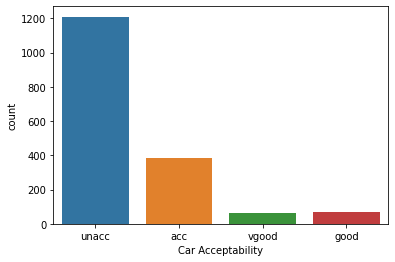

In [ ]:
sns.countplot(x='Car Acceptability', data=data)

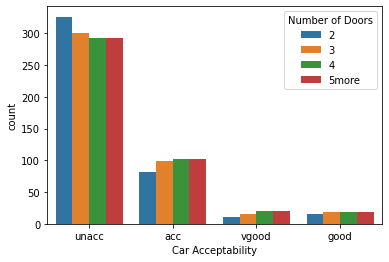

In [ ]:
sns.countplot(x='Car Acceptability', hue='Number of Doors', data=data)

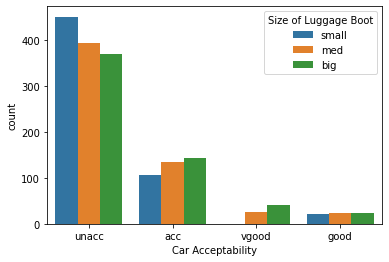

In [ ]:
sns.countplot(x="Car Acceptability", hue="Size of Luggage Boot", data=data)

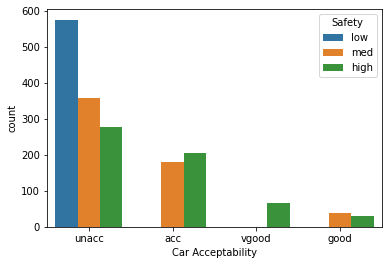

In [ ]:
sns.countplot(x="Car Acceptability", hue="Safety", data=data)

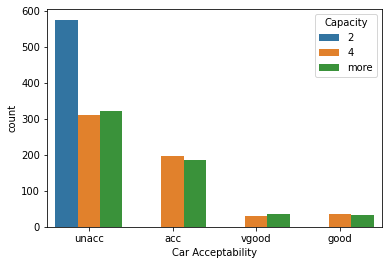

In [ ]:
sns.countplot(x="Car Acceptability", hue="Capacity", data=data)

In [ ]:
encoder = ce.OrdinalEncoder(cols = ['Car Acceptability', 'Buying Price', 'Maintenance Price', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'Safety'])
data = encoder.fit_transform(data)
data.head(15)

,Car Acceptability,Buying Price,Maintenance Price,Number of Doors,Capacity,Size of Luggage Boot,Safety
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,3
3,1,1,1,1,1,2,1
4,1,1,1,1,1,2,2
5,1,1,1,1,1,2,3
6,1,1,1,1,1,3,1
7,1,1,1,1,1,3,2
8,1,1,1,1,1,3,3
9,1,1,1,1,2,1,1


In [ ]:
data.dtypes

Car Acceptability       int64
Buying Price            int64
Maintenance Price       int64
Number of Doors         int64
Capacity                int64
Size of Luggage Boot    int64
Safety                  int64
dtype: object

In [ ]:
x = data.drop(['Car Acceptability'], axis = 1)
y = data['Car Acceptability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print("X_train: {}".format(x_train.shape))
print("X_test: {}".format(x_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1209, 6)
X_test: (519, 6)
Y_train: (1209,)
Y_test: (519,)


In [ ]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=48)
# fit the model

clf_en.fit(x_train, y_train)

yp_train = clf_en.predict(x_train)
yp_test = clf_en.predict(x_test)
evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.98      0.92      0.94       852
           2       0.73      0.77      0.75       266
           3       0.00      0.00      0.00        41
           4       0.39      1.00      0.56        50

    accuracy                           0.86      1209
   macro avg       0.52      0.67      0.56      1209
weighted avg       0.86      0.86      0.85      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.95      0.94      0.94       358
           2       0.76      0.68      0.72       118
           3       0.00      0.00      0.00        24
           4       0.30      1.00      0.46        19

    accuracy                           0.84       519
   macro avg       0.50      0.65      0.53       519
weighted avg       0.84      0.84    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=['unacc', 'acc', 'vgood', 'good'],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("entropy.jpg")
graph 

In [2]:
clf_en.predict([[1,3,1,1,1,2]])

NameError: ignored